# Introduction to Quantum Computing 

**Instructor** : Hwajung Kang, Ph.D., Education Delivery Program Manager, IBM Quantum

In [2]:
from qiskit import *
from qiskit.tools.jupyter import *
from qiskit.visualization import *

from qiskit_aer import AerSimulator
from qiskit_ibm_provider import IBMProvider

import numpy as np
import matplotlib.pyplot as plt

- A specific simulator or device is called a `backend`.


- `backend.run` takes a quantum circuit, or list of circuits, and execute the circuits on the chosen backend.


- By default, simulators execute `shots=1024` realizations of a circuit under ideal condition.



## Single Qubit Operations - X, H and Z

### X gate : Not gate

$X = \begin{bmatrix}0 & 1 \\ 1 & 0 \end{bmatrix} , ~~~~~~ XX = I$

$X|0\rangle = |1\rangle ~~~~~~~~~ X|1\rangle = |0\rangle $

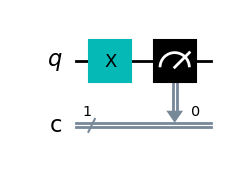

In [3]:
qc = QuantumCircuit(1, 1)
qc.x(0)
qc.measure(0, 0) 
qc.draw('mpl')

In [4]:
backend = AerSimulator()

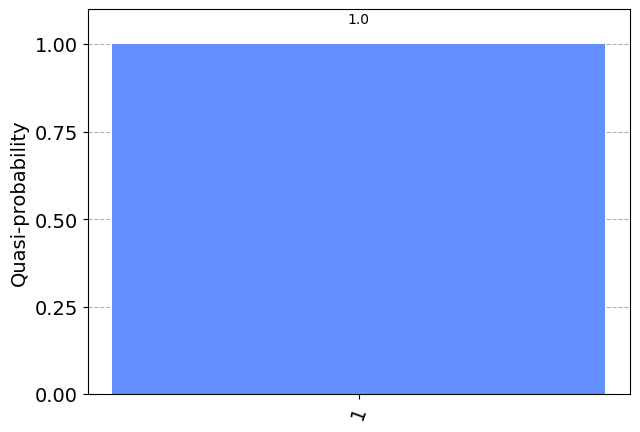

In [5]:
job = backend.run(qc) #shot
results = job.result()
counts = results.get_counts()

plot_distribution(counts)
#plot_histogram(counts)

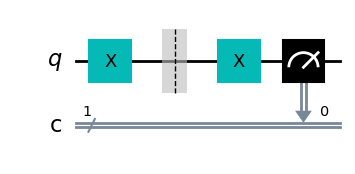

In [6]:
qc = QuantumCircuit(1, 1)
qc.x(0)
qc.barrier()
qc.x(0)
qc.measure(0, 0)
qc.draw('mpl') # xx

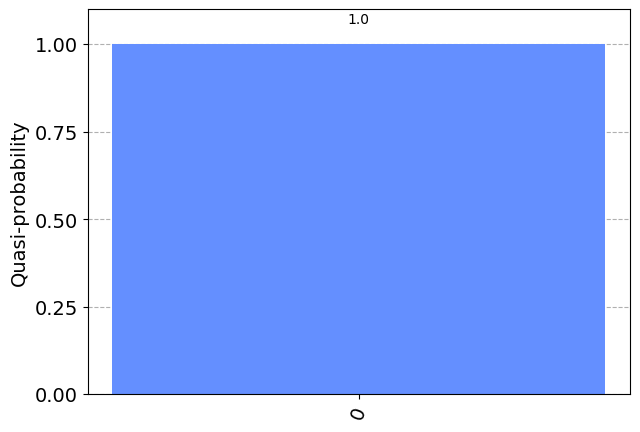

In [7]:
job = backend.run(qc)
results = job.result()
counts = results.get_counts()

plot_distribution(counts)
#plot_histogram(counts)

### H gate : Hadamard gate, create superposition

$H = \frac{1}{\sqrt{2}} \begin{bmatrix}1 & 1 \\ 1 & -1 \end{bmatrix} , ~~~~~~  HH = I $

$H|0\rangle = \frac{1}{\sqrt{2}}(|0\rangle + |1\rangle) = |+\rangle ~~~~~~~~~
H|1\rangle = \frac{1}{\sqrt{2}}(|0\rangle - |1\rangle) = |-\rangle$ 

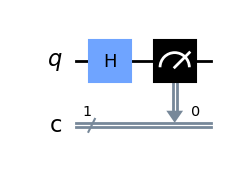

In [8]:
qc = QuantumCircuit(1, 1)
qc.h(0)
qc.measure(0, 0)

qc.draw('mpl')

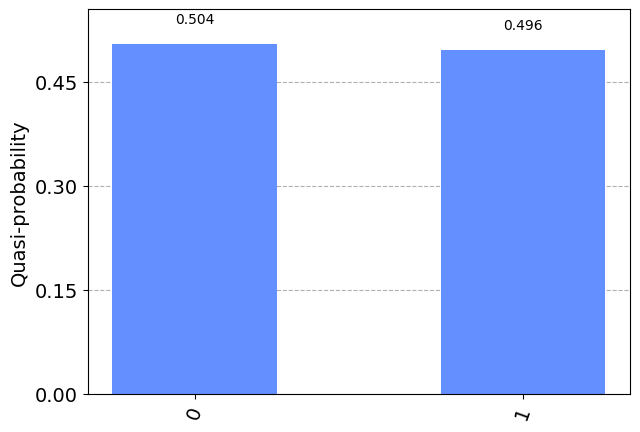

In [9]:
job = backend.run(qc)
results = job.result()
counts = results.get_counts()

plot_distribution(counts)
#plot_histogram(counts)

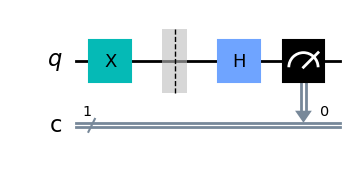

In [10]:
qc = QuantumCircuit(1, 1)
qc.x(0)
qc.barrier()
qc.h(0)
qc.measure(0, 0)

qc.draw('mpl')

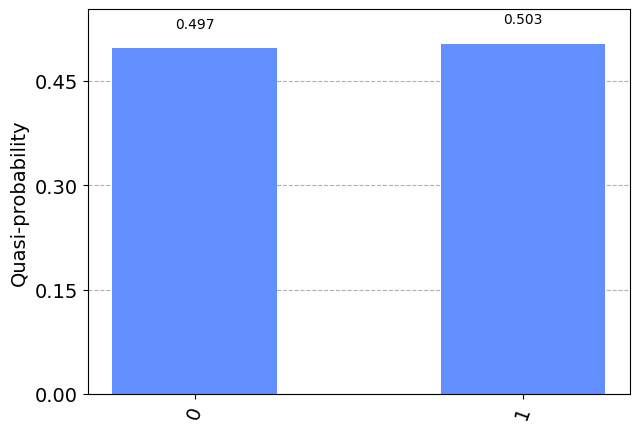

In [11]:
job = backend.run(qc)
results = job.result()
counts = results.get_counts()

plot_distribution(counts)
#plot_histogram(counts)

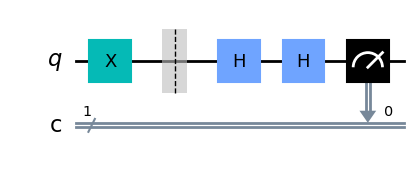

In [12]:
qc = QuantumCircuit(1, 1)
qc.x(0)
qc.barrier()
qc.h(0)
qc.h(0)
qc.measure(0, 0)
qc.draw('mpl')

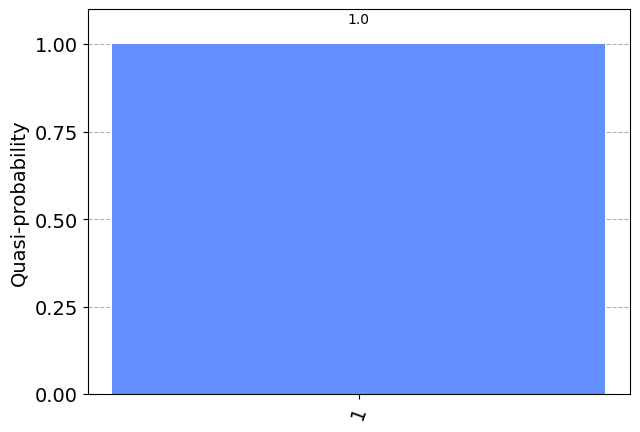

In [13]:
job = backend.run(qc)
results = job.result()
counts = results.get_counts()

plot_distribution(counts)
#plot_histogram(counts)

### Z gate :  create relative phase $\pi$

$Z = \begin{bmatrix}1 & 0 \\ 0 & -1 \end{bmatrix} , ~~~~~~ ZZ=I $

$Z|0\rangle = |0\rangle ~~~~~~~~~
Z|1\rangle = e^{i\pi} |1\rangle = - |1\rangle $ 

### S gate:  create relative phase $\pi/2$

$S = \begin{bmatrix}1 & 0 \\ 0 & i \end{bmatrix} ~~~~~~ SS^{\dagger}=I $

$S|0\rangle = |0\rangle ~~~~~~~~~
S|1\rangle = e^{i\pi/2}|1\rangle = i |1\rangle $ 

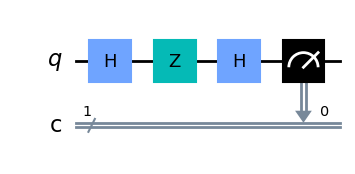

In [14]:
qc_z = QuantumCircuit(1, 1)
qc_z.h(0)
qc_z.z(0)
qc_z.h(0)
qc_z.measure(0, 0)
qc_z.draw('mpl')

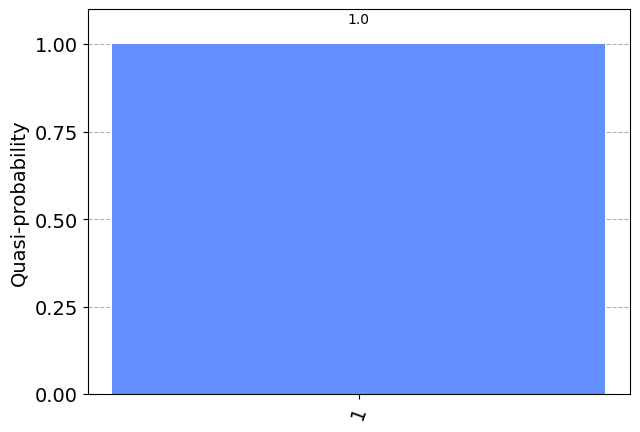

In [15]:
job = backend.run(qc_z)
results = job.result()
counts = results.get_counts()

plot_distribution(counts)
#plot_histogram(counts)

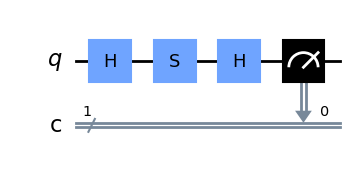

In [16]:
qc_s = QuantumCircuit(1,1)
qc_s.h(0)
qc_s.s(0)
qc_s.h(0)
qc_s.measure(0, 0)
qc_s.draw('mpl')

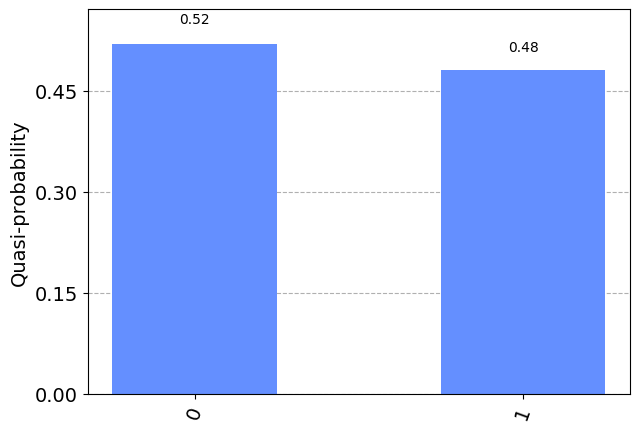

In [17]:
job = backend.run(qc_s)
results = job.result()
counts = results.get_counts()

plot_distribution(counts)
#plot_histogram(counts)

### T gate:  create relative phase $\pi/4$

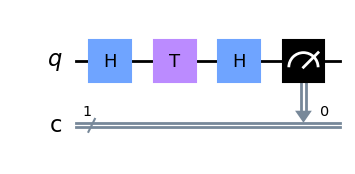

In [18]:
qc_t = QuantumCircuit(1, 1)
qc_t.h(0)
qc_t.t(0)
qc_t.h(0)
qc_t.measure(0, 0)
qc_t.draw('mpl')

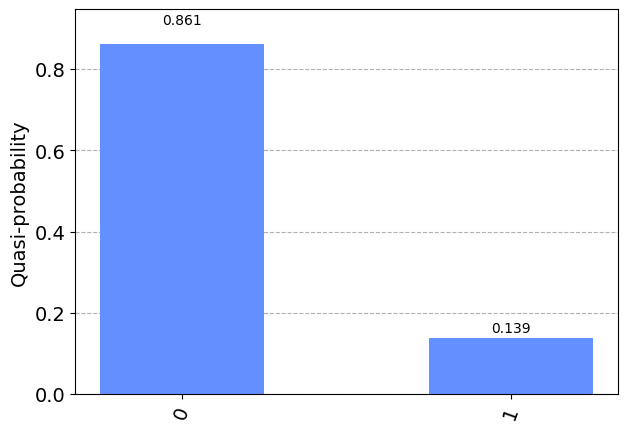

In [19]:
job = backend.run(qc_t)
results = job.result()
counts = results.get_counts()

plot_distribution(counts)
#plot_histogram(counts)

<div class="alert alert-success">
    <h3>Hands-on exercise 1.</h3>
    <p>
    Build and simulate quantum circuits showing interferenece similar to the above examples but with the phase gate `p` varying the phase angle. Plot the probability of measuring one as a function of the phase angle. </p>
</div>

[PhaseGate](https://qiskit.org/documentation/stubs/qiskit.circuit.QuantumCircuit.p.html#qiskit.circuit.QuantumCircuit.p)

In [20]:
## your code goes here

angs = np.linspace(0, 6*np.pi, 100)

qcs = []
for ang in angs: 
    qc = QuantumCircuit(1)
    qc.h(0)
    qc.p(ang, 0)
    qc.h(0)
    qc.measure_all()
    qcs.append(qc)

shots = 10000
counts = backend.run(qcs, shots=shots).result().get_counts()

p1s = []
for count in counts:
    if '1' in count:
        p1s.append(count['1']/shots)
    else:
        p1s.append(0)

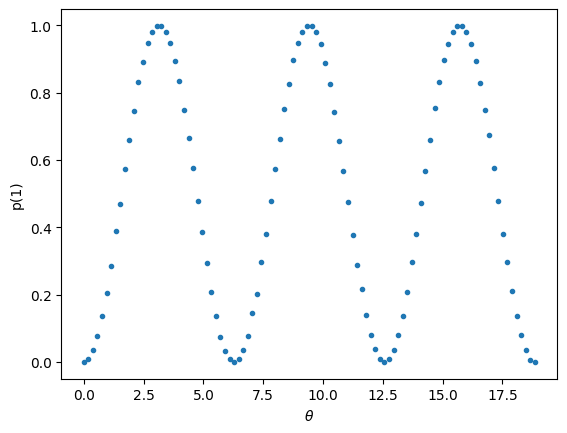

In [21]:
fig, ax = plt.subplots()
ax.plot(angs, p1s, '.')
ax.set_xlabel('$\\theta$')
ax.set_ylabel('p(1)');

## Composite system, Entanglement, two-qubit Gate

### Construct Bell state

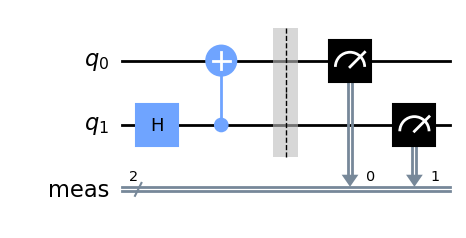

In [22]:
bell = QuantumCircuit(2)
bell.h(1)
bell.cx(1, 0)
bell.measure_all()
bell.draw('mpl')

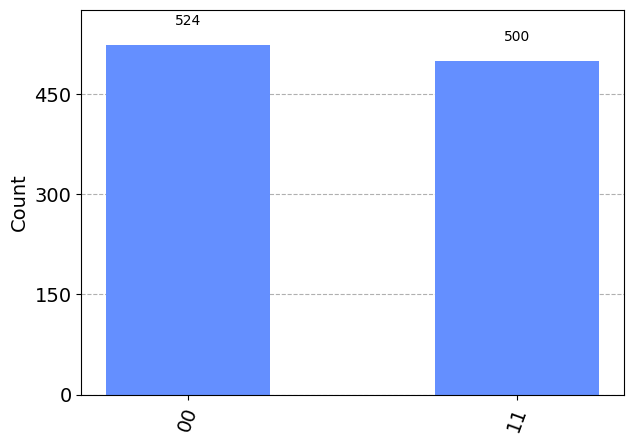

In [23]:
job = backend.run(bell)
counts = job.result().get_counts()

plot_histogram(counts)

<div class="alert alert-success">
    <h3>Hands-on exercise 2.</h3>
    <p>
    Build and simulate the bell state circuit that measures the both qubits in the superposition basis. </p>
</div>

$p_{+} = |\langle+|\psi\rangle|^{2} = |\langle 0|H|\psi\rangle|^{2}$

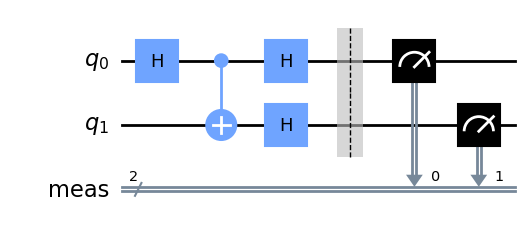

In [24]:
## your code gose here

bell2 = QuantumCircuit(2)
bell2.h(0)
bell2.cx(0, 1)
bell2.h(range(2))
bell2.measure_all()

bell2.draw('mpl')

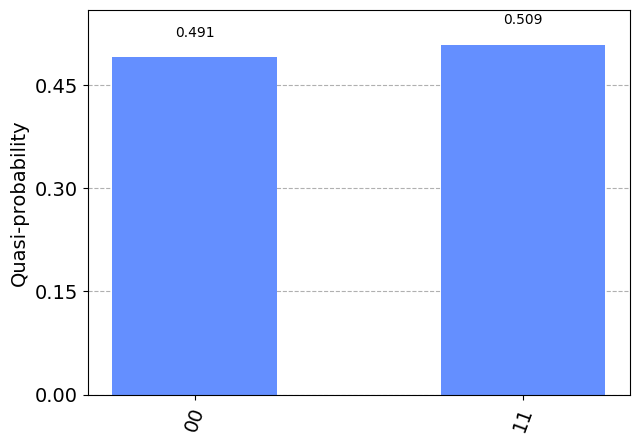

In [25]:
counts = backend.run(bell2).result().get_counts()
plot_distribution(counts)

<div class="alert alert-success">
    <h3>Hands-on exercise 3.</h3>
    <p>
    Build and simulate a quantum circuit to generate the three qubit GHZ state, $|\psi\rangle = \frac{1}{\sqrt{2}}(|000\rangle + |111\rangle)$. </p>
</div>

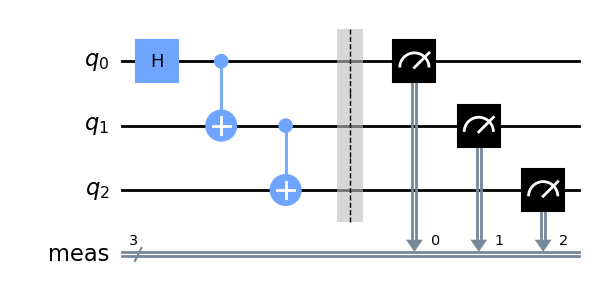

In [26]:
## your code goes here

ghz3 = QuantumCircuit(3)
ghz3.h(0)
ghz3.cx([0, 1], [1, 2])
ghz3.measure_all()

ghz3.draw('mpl')

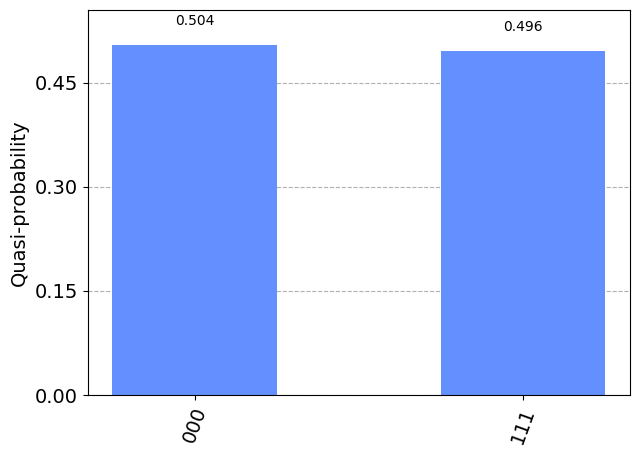

In [27]:
counts = backend.run(ghz3, shots=shots).result().get_counts()
plot_distribution(counts)

### Construct W state

[W state](https://en.wikipedia.org/wiki/W_state)

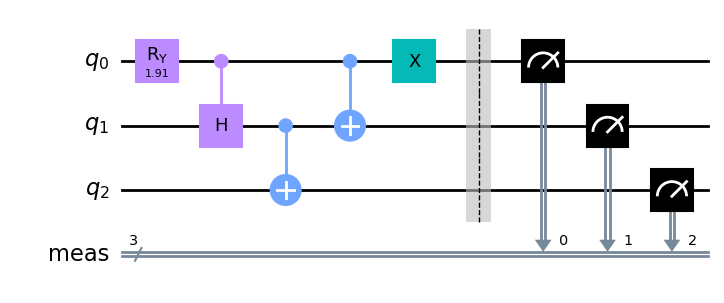

In [28]:
phi = 2 * np.arccos(1/np.sqrt(3))
w = QuantumCircuit(3)
w.ry(phi, 0)
w.ch(0, 1)
w.cx([1, 0],[2, 1])
w.x(0)
w.measure_all()

w.draw('mpl')

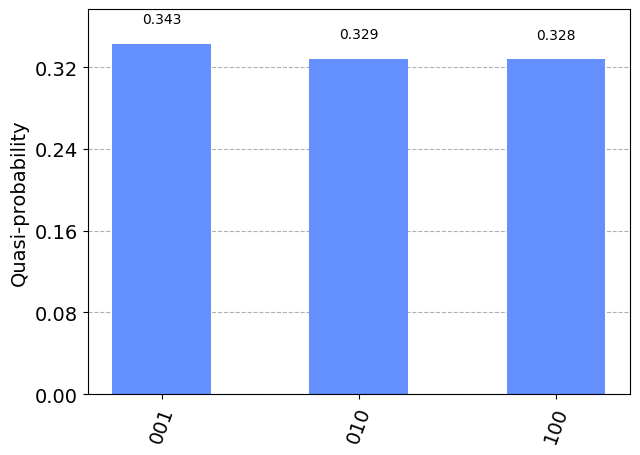

In [29]:
# transpile
w_trans = transpile(w, backend)
counts = backend.run(w_trans, shots=shots).result().get_counts()
plot_distribution(counts)

## Execute Bell State on Quantum Computer

<div class="alert alert-block alert-info">
    
**STEPS**
1. Choose an IBM Quantum system
2. Transpile the circuit to be executable
3. Run the transpiled circuit on the chosen system
    
</div>

### Step1 Choose a hardware and access its information

[IBM Qauntum](https://quantum-computing.ibm.com)

In [39]:
prov = IBMProvider()

In [40]:
prov.backends()

[<IBMBackend('ibmq_kolkata')>,
 <IBMBackend('ibmq_manila')>,
 <IBMBackend('ibm_cairo')>,
 <IBMBackend('ibm_auckland')>,
 <IBMBackend('ibm_perth')>,
 <IBMBackend('ibm_brisbane')>,
 <IBMBackend('ibm_nazca')>,
 <IBMBackend('ibmq_quito')>,
 <IBMBackend('ibmq_lima')>,
 <IBMBackend('ibm_seattle')>,
 <IBMBackend('ibm_cusco')>,
 <IBMBackend('ibmq_guadalupe')>,
 <IBMBackend('ibm_sherbrooke')>,
 <IBMBackend('ibm_hanoi')>,
 <IBMBackend('ibmq_belem')>,
 <IBMBackend('ibmq_jakarta')>,
 <IBMBackend('ibm_lagos')>,
 <IBMBackend('ibm_nairobi')>,
 <IBMBackend('ibm_algiers')>,
 <IBMBackend('ibmq_qasm_simulator')>,
 <IBMBackend('ibmq_mumbai')>,
 <IBMBackend('simulator_statevector')>,
 <IBMBackend('simulator_stabilizer')>,
 <IBMBackend('simulator_extended_stabilizer')>,
 <IBMBackend('simulator_mps')>]

In [41]:
backend = prov.get_backend('ibmq_manila')

In [42]:
conf = backend.configuration()

print('backend:{}'.format(backend.name))
print('num_qubit:{}, QV:{}, CLOP:{}\n'.format(conf.num_qubits, conf.quantum_volume, conf.clops))
print('max_num_circuits:{},'.format(conf.max_experiments), 
      'max_shots:{}\n'.format(conf.max_shots)) #default num_shots = 4000
print('basis gates:{}'.format(conf.basis_gates),'\n')
print('coupling map:{}'.format(conf.coupling_map))

backend:ibmq_manila
num_qubit:5, QV:32, CLOP:2819

max_num_circuits:300, max_shots:100000

basis gates:['cx', 'id', 'rz', 'sx', 'x'] 

coupling map:[[0, 1], [1, 0], [1, 2], [2, 1], [2, 3], [3, 2], [3, 4], [4, 3]]


In [43]:
backend.configuration().to_dict()

{'backend_name': 'ibmq_manila',
 'backend_version': '1.2.3',
 'n_qubits': 5,
 'basis_gates': ['cx', 'id', 'rz', 'sx', 'x'],
 'gates': [{'name': 'id',
   'parameters': [],
   'qasm_def': 'gate id q { U(0, 0, 0) q; }',
   'coupling_map': [[0], [1], [2], [3], [4]]},
  {'name': 'rz',
   'parameters': ['theta'],
   'qasm_def': 'gate rz(theta) q { U(0, 0, theta) q; }',
   'coupling_map': [[0], [1], [2], [3], [4]]},
  {'name': 'sx',
   'parameters': [],
   'qasm_def': 'gate sx q { U(pi/2, 3*pi/2, pi/2) q; }',
   'coupling_map': [[0], [1], [2], [3], [4]]},
  {'name': 'x',
   'parameters': [],
   'qasm_def': 'gate x q { U(pi, 0, pi) q; }',
   'coupling_map': [[0], [1], [2], [3], [4]]},
  {'name': 'cx',
   'parameters': [],
   'qasm_def': 'gate cx q0, q1 { CX q0, q1; }',
   'coupling_map': [[0, 1],
    [1, 0],
    [1, 2],
    [2, 1],
    [2, 3],
    [3, 2],
    [3, 4],
    [4, 3]]},
  {'name': 'reset', 'parameters': None, 'qasm_def': None}],
 'local': False,
 'simulator': False,
 'conditional': 

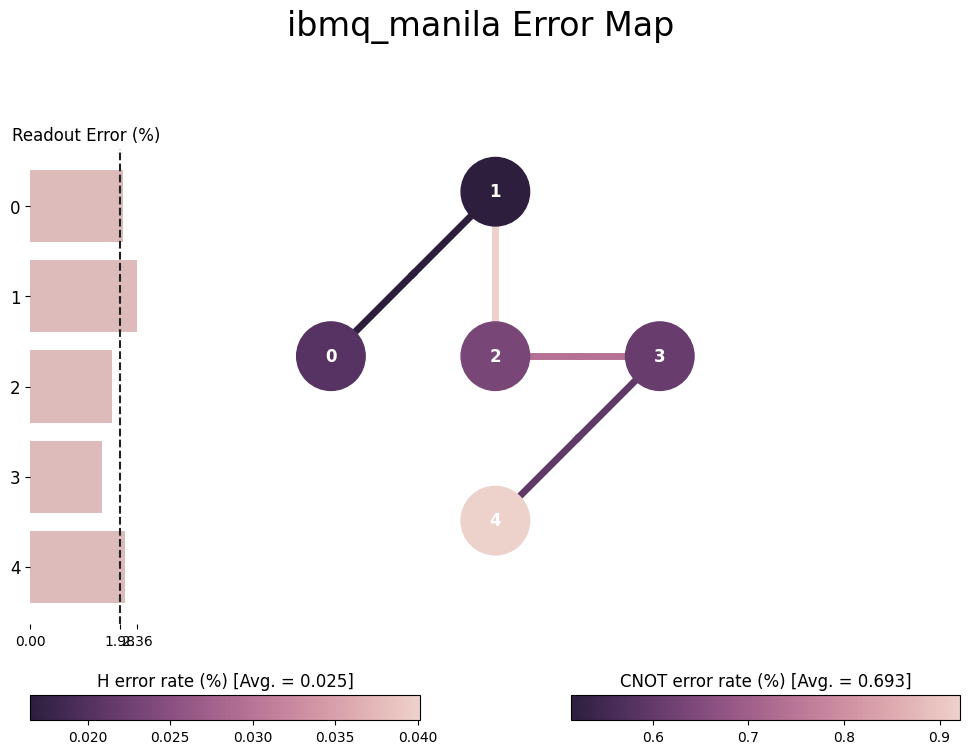

In [34]:
plot_error_map(backend)

### Step 2 Transpile a circuit (circuits) to run

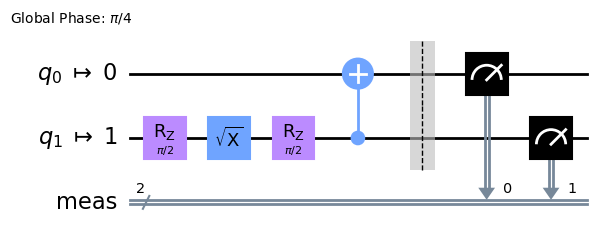

In [44]:
bell_trans = transpile(bell, backend)
#display(bell_trans.draw('mpl'))
display(bell_trans.draw('mpl', idle_wires=False))

### Step 3. Execute a circuit (circuits) on a chosen system. 

In [36]:
# job = backend.run(bell_trans)
# print(job.job_id())

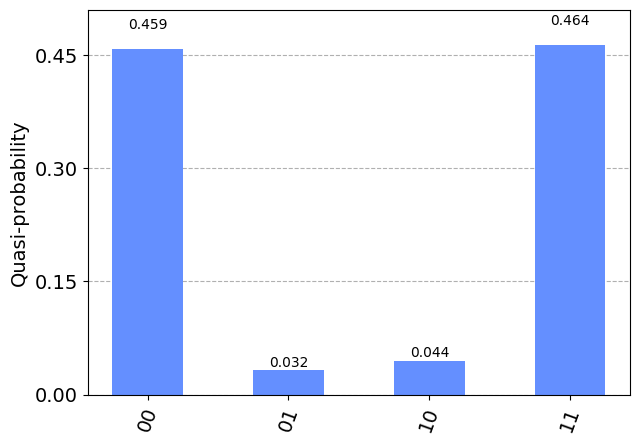

In [45]:
job = prov.retrieve_job('cgs6d13nv0imnkjds9bg')
counts = job.result().get_counts()
plot_distribution(counts)

**Near-term Quantum Systems have noisy qubits, gates, and measurements.**

The noise properties of devices and individual qubits are different.

In [38]:
import qiskit.tools.jupyter
%qiskit_version_table
%qiskit_copyright